In [3]:
import pandas as pd

df = pd.read_csv("./data/curData.csv")

In [11]:
df = df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)

In [12]:
for col in df.columns:
    print(col, ": ", df[col].dtype)

loan_amnt :  float64
term :  float64
int_rate :  float64
installment :  float64
purpose :  object
emp_length :  int64
home_ownership :  object
annual_inc :  float64
dti :  float64
inq_last_6mths :  float64
delinq_2yrs :  float64
open_acc :  float64
pub_rec :  float64
revol_bal :  float64
revol_util :  float64
total_acc :  float64
issue_d :  object
loan_risk :  int64
installment_to_income :  float64
fico_score :  float64
credit_age :  float64
issue_month :  object
fed_funds_rate :  float64
unemployment_rate :  float64
cpi :  float64
real_gdp :  float64
debt_service_ratio :  float64


In [21]:
import math
import numpy as np

ml_df = df.drop(["issue_d", "issue_month"], axis=1)
ml_df["loan_to_income"] = ml_df["loan_amnt"] / np.maximum(df["annual_inc"], 1)
ml_df["installment_to_loan"] = ml_df["installment"] / ml_df["loan_amnt"]
ml_df["annual_inc_log"] = np.log1p(ml_df["annual_inc"])
ml_df["rate_term"] = ml_df["int_rate"] * ml_df["term"]

ml_df["loan_risk"].unique()

array([0, 1])

In [18]:
ml_features = list(ml_df.columns)
input_features = ml_features

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'purpose',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'delinq_2yrs',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'loan_risk',
 'installment_to_income',
 'fico_score',
 'credit_age',
 'fed_funds_rate',
 'unemployment_rate',
 'cpi',
 'real_gdp',
 'debt_service_ratio']

In [32]:
# Split into Train, Val, Test based on time (oldest -> recent)
ml_df["date"] = pd.to_datetime(df["issue_d"])
ml_df = ml_df.sort_values("date").reset_index(drop=True)

# Change as needed
train_frac = 0.8
val_frac = 0.1
test_frac = 0.1

n = len(ml_df)
train_n = int(train_frac * n)
val_n = int(val_frac * n)

train_df = df.iloc[:train_n] # First rows for training
val_df = df.iloc[train_n : train_n + val_n] # Next 0.1 for validation
test_df = df.iloc[train_n + val_n:] # Last for testing

In [35]:
print(len(train_df), len(val_df), len(test_df))
print(train_df["loan_risk"].value_counts(), val_df["loan_risk"].value_counts(), test_df["loan_risk"].value_counts())

1808534 226066 226068
loan_risk
0    1580265
1     228269
Name: count, dtype: int64 loan_risk
0    188951
1     37115
Name: count, dtype: int64 loan_risk
0    200625
1     25443
Name: count, dtype: int64


In [ ]:
train_df.to_csv("./data/train.csv", index=False)
val_df.to_csv("./data/val.csv", index=False)
test_df.to_csv("./data/test.csv", index=False)

In [45]:
# Look at categorical data
import pandas as pd
train_df = pd.read_csv("./data/train.csv")
train_n = len(train_df)
val_df = pd.read_csv("./data/val.csv")
val_n = len(val_df)
test_df = pd.read_csv("./data/test.csv")

df = pd.concat([train_df, val_df, test_df], axis=0)

In [47]:
for col in df.columns:
    print(col, df[col].dtype)
# Purpose, home_ownership, issue_d(to be removed)

loan_amnt float64
term float64
int_rate float64
installment float64
purpose object
emp_length int64
home_ownership object
annual_inc float64
dti float64
inq_last_6mths float64
delinq_2yrs float64
open_acc float64
pub_rec float64
revol_bal float64
revol_util float64
total_acc float64
issue_d object
loan_risk int64
installment_to_income float64
fico_score float64
credit_age float64
issue_month object
fed_funds_rate float64
unemployment_rate float64
cpi float64
real_gdp float64
debt_service_ratio float64


In [48]:
len(df["purpose"].unique())
# 14 categories => Consider one-hot encoding

14

In [51]:
one_hots = pd.get_dummies(df["purpose"])
one_hots

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226063,False,False,False,False,True,False,False,False,False,False,False,False,False,False
226064,False,False,True,False,False,False,False,False,False,False,False,False,False,False
226065,False,False,True,False,False,False,False,False,False,False,False,False,False,False
226066,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = pd.concat([df, one_hots], axis=1)
df = df.drop("purpose", axis=1)
# Purpose column now one-hot encoded

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,dti,inq_last_6mths,delinq_2yrs,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,3600.0,36.0,13.99,123.03,10,MORTGAGE,55000.0,5.91,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,24700.0,36.0,11.99,820.28,10,MORTGAGE,65000.0,16.06,4.0,1.0,...,False,False,False,False,False,False,False,True,False,False
2,20000.0,60.0,10.78,432.66,10,MORTGAGE,63000.0,10.78,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
3,35000.0,60.0,14.85,829.90,10,MORTGAGE,110000.0,17.06,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
4,10400.0,60.0,22.45,289.91,3,MORTGAGE,104433.0,25.37,3.0,1.0,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226063,24000.0,60.0,12.79,543.50,7,MORTGAGE,95000.0,19.61,0.0,0.0,...,True,False,False,False,False,False,False,False,False,False
226064,24000.0,60.0,10.49,515.74,10,MORTGAGE,108000.0,34.94,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
226065,40000.0,60.0,10.49,859.56,9,MORTGAGE,227000.0,12.75,1.0,7.0,...,False,False,False,False,False,False,False,False,False,False
226066,24000.0,60.0,14.49,564.56,6,RENT,110000.0,18.30,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df[one_hots.columns] = df[one_hots.columns].astype(int) # T/F -> 1/0

In [59]:
# Deal with homeownership
df["home_ownership"].unique()
# Lets one-hot encode these as well.

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [61]:
df = pd.concat([df, pd.get_dummies(df["home_ownership"]).astype(int)], axis=1)

In [ ]:
df = df.drop("home_ownership", axis=1)

,loan_amnt,term,int_rate,installment,purpose,emp_length,annual_inc,dti,inq_last_6mths,delinq_2yrs,...,NONE,OTHER,OWN,RENT,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
0,3600.0,36.0,13.99,123.03,debt_consolidation,10,55000.0,5.91,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,24700.0,36.0,11.99,820.28,small_business,10,65000.0,16.06,4.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,20000.0,60.0,10.78,432.66,home_improvement,10,63000.0,10.78,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,35000.0,60.0,14.85,829.90,debt_consolidation,10,110000.0,17.06,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,10400.0,60.0,22.45,289.91,major_purchase,3,104433.0,25.37,3.0,1.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226063,24000.0,60.0,12.79,543.50,home_improvement,7,95000.0,19.61,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
226064,24000.0,60.0,10.49,515.74,debt_consolidation,10,108000.0,34.94,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0
226065,40000.0,60.0,10.49,859.56,debt_consolidation,9,227000.0,12.75,1.0,7.0,...,0,0,0,0,0,1,0,0,0,0
226066,24000.0,60.0,14.49,564.56,debt_consolidation,6,110000.0,18.30,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [63]:
df = df.loc[:,~df.columns.duplicated()].copy()

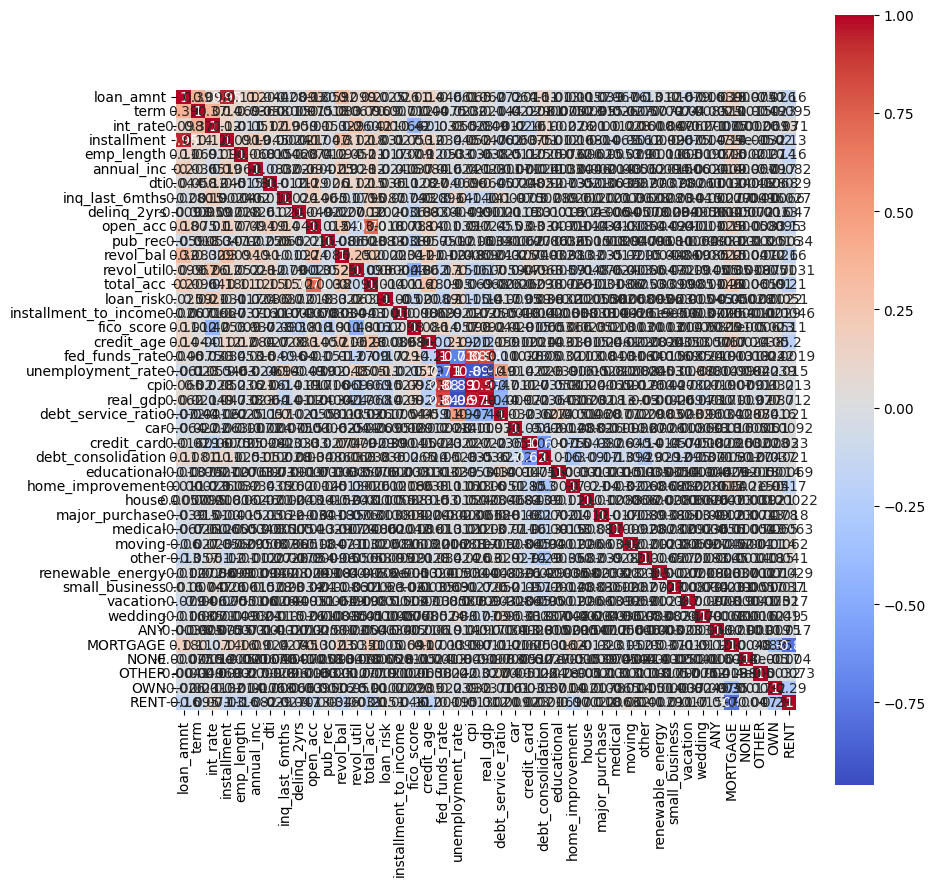

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

In [84]:
# Check missing data
for col in df.columns:
    print(col, ":", df[col].isnull().sum())


loan_amnt : 0
term : 0
int_rate : 0
installment : 0
purpose : 0
emp_length : 0
home_ownership : 0
annual_inc : 4
dti : 1711
inq_last_6mths : 30
delinq_2yrs : 29
open_acc : 29
pub_rec : 29
revol_bal : 0
revol_util : 1802
total_acc : 29
issue_d : 0
loan_risk : 0
installment_to_income : 4
fico_score : 0
credit_age : 29
issue_month : 0
fed_funds_rate : 0
unemployment_rate : 0
cpi : 0
real_gdp : 0
debt_service_ratio : 0
car : 0
credit_card : 0
debt_consolidation : 0
educational : 0
home_improvement : 0
house : 0
major_purchase : 0
medical : 0
moving : 0
other : 0
renewable_energy : 0
small_business : 0
vacation : 0
wedding : 0
ANY : 0
MORTGAGE : 0
NONE : 0
OTHER : 0
OWN : 0
RENT : 0


In [86]:
len(df[df.isnull().any(axis=1)]) / len(df)

0.001552638423687158

In [87]:
# Strategy to deal with Missing values
# Amount of missing data is very miniscule and cant reasonably be replaced; will remove
df = df.dropna()

In [88]:
len(df[df.isnull().any(axis=1)]) / len(df)

0.0

In [ ]:
# All cleaned!
df.sort_values(by="issue_d")
df = df.drop("issue_d",axis=1)

,loan_amnt,term,int_rate,installment,purpose,emp_length,home_ownership,annual_inc,dti,inq_last_6mths,...,renewable_energy,small_business,vacation,wedding,ANY,MORTGAGE,NONE,OTHER,OWN,RENT
1654372,4400.0,36.0,9.64,141.25,debt_consolidation,2,MORTGAGE,30000.0,3.72,0.0,...,0,0,0,0,0,1,0,0,0,0
1651644,7500.0,36.0,13.75,255.43,debt_consolidation,0,OWN,22000.0,14.29,0.0,...,0,0,0,0,0,0,0,0,1,0
1654371,6000.0,36.0,10.59,195.28,debt_consolidation,0,RENT,20000.0,12.90,4.0,...,0,0,0,0,0,0,0,0,0,1
1654366,6000.0,36.0,13.12,202.51,credit_card,2,RENT,12000.0,4.40,9.0,...,0,0,0,0,0,0,0,0,0,1
1654350,1800.0,36.0,14.38,61.86,educational,1,RENT,40000.0,4.11,9.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379433,23100.0,36.0,6.46,707.58,debt_consolidation,10,RENT,29500.0,18.43,0.0,...,0,0,0,0,0,0,0,0,0,1
1379432,13000.0,60.0,8.19,264.78,debt_consolidation,10,OWN,250000.0,13.00,0.0,...,0,0,0,0,0,0,0,0,1,0
1379431,17150.0,36.0,15.02,594.68,credit_card,10,OWN,40000.0,34.08,1.0,...,0,0,0,0,0,0,0,0,1,0
1379438,12000.0,36.0,11.31,394.63,credit_card,8,MORTGAGE,65000.0,14.00,0.0,...,0,0,0,0,0,1,0,0,0,0


In [96]:
# Split into train, val, test by percent 0.7, 0.15, 0.15
n = len(df)
train_df = df.iloc[:int(0.7*n)]
val_df = df.iloc[int(0.7*n):int(0.85*n)]
test_df = df.iloc[int(0.85*n):]

In [99]:
print(len(train_df) + len(val_df) + len(test_df) - n)

0


In [105]:
print("Col: # of outliers, outliers/total")
for col in train_df.columns:
    if pd.api.types.is_numeric_dtype(train_df[col]):
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
        print(f"{col}: {len(outliers)}, {len(outliers)/len(train_df[col])}")

Col: # of outliers, outliers/total
loan_amnt: 26060, 0.01649356649641458
term: 0, 0.0
int_rate: 32495, 0.020566325529585257
installment: 44774, 0.0283377953304093
emp_length: 0, 0.0
annual_inc: 74194, 0.04695793064600857
dti: 16013, 0.010134745982620362
inq_last_6mths: 59112, 0.03741242144037063
delinq_2yrs: 299501, 0.18955639521268852
open_acc: 41461, 0.026240973158397733
pub_rec: 255985, 0.16201479737470015
revol_bal: 97340, 0.061607205017689765
revol_util: 100, 6.329073866621097e-05
total_acc: 36522, 0.023115043575673573
loan_risk: 199033, 0.1259694558895197
installment_to_income: 37494, 0.02373022955550914
fico_score: 51921, 0.0328611844228834
credit_age: 34280, 0.02169606521477712
fed_funds_rate: 0, 0.0
unemployment_rate: 0, 0.0
cpi: 0, 0.0
real_gdp: 0, 0.0
debt_service_ratio: 0, 0.0
car: 15178, 0.0096062683147575
credit_card: 375620, 0.23773267257802166
debt_consolidation: 0, 0.0
educational: 1, 6.329073866621097e-07
home_improvement: 104022, 0.06583629217536598
house: 9221, 0.00

In [111]:
# Look at categorical data
import pandas as pd
train_df = pd.read_csv("./data/train.csv")
train_n = len(train_df)
val_df = pd.read_csv("./data/val.csv")
val_n = len(val_df)
test_df = pd.read_csv("./data/test.csv")

df = pd.concat([train_df, val_df, test_df], axis=0)

In [116]:
df["issue_month"] = pd.to_datetime(df["issue_month"]).dt.month

In [108]:
df = df.drop(["issue_d", "purpose", "home_ownership"], axis=1)

In [117]:
# Split into train, val, test by percent 0.7, 0.15, 0.15
n = len(df)
train_df = df.iloc[:int(0.7*n)]
val_df = df.iloc[int(0.7*n):int(0.85*n)]
test_df = df.iloc[int(0.85*n):]

In [118]:
train_df.to_csv("./data/train.csv", index=False)
val_df.to_csv("./data/val.csv", index=False)
test_df.to_csv("./data/test.csv", index=False)